## Netflix Data Visualization project

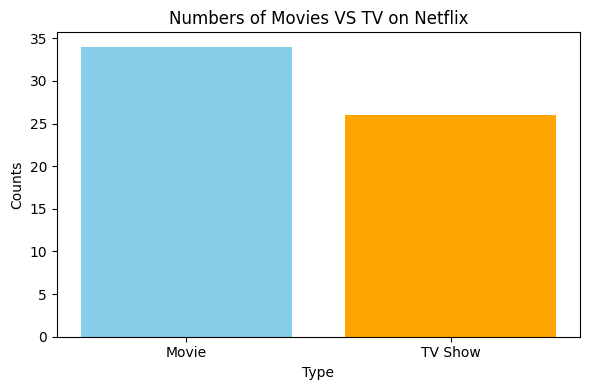

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
# load data
df = pd.read_csv('datalab_export_2025-11-23 13_47_40.csv')
# print(df.head)
#  clean data
df = df.dropna(subset=['type','country','release_year','rating','duration'])
type_counts =df['type'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(type_counts.index,type_counts.values, color=['skyblue','orange'])
plt.title('Numbers of Movies VS TV on Netflix')
plt.xlabel('Type')
plt.ylabel('Counts')
plt.tight_layout()
plt.savefig('movies_tv.png')
